# Recurrent Neural Networks and The Yield Curve 

Today we will be exploring yield curves spreads and using data from **Quandl**. Quandl offers quick and easy API's to use and retrieve for free, and already in DataFrame form. Who says a free lunch doesn't exist!


- Here is the data: https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates
- Here is a tutorial to install Quandl: https://www.quandl.com/tools/python

In [217]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [218]:
import quandl
df = quandl.get("USTREASURY/YIELD", authtoken="s-LF8xGE9kdc-bsVjrUN")

In [77]:
df.head(5)

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [78]:
# This is method is equivalent to washing your hands in Covid-19... ALWAYS AND OFTEN!
df.describe()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
count,4765.000000,460.000000,7661.000000,7664.000000,7664.000000,7664.000000,7664.000000,7664.000000,7664.000000,7664.000000,6725.000000,6670.000000
mean,1.271108,1.586674,2.732331,2.862120,2.987584,3.286769,3.502484,3.895117,4.200163,4.436215,4.531943,4.975133
std,1.472290,0.898100,2.285399,2.319845,2.319276,2.340768,2.290136,2.175081,2.084104,1.975364,1.657867,1.908187
min,0.000000,0.000000,0.000000,0.020000,0.080000,0.110000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.070000,0.782500,0.260000,0.420000,0.567500,0.950000,1.380000,1.830000,2.250000,2.650000,2.920000,3.120000
50%,0.880000,1.955000,2.360000,2.460000,2.570000,2.965000,3.275000,3.810000,4.060000,4.340000,4.670000,4.790000
75%,1.920000,2.380000,4.990000,5.110000,5.110000,5.380000,5.510000,5.730000,5.950000,5.950000,5.830000,6.497500
max,5.270000,2.480000,8.260000,8.490000,8.640000,9.050000,9.110000,9.100000,9.120000,9.090000,8.300000,9.180000


In [79]:
type(df)

pandas.core.frame.DataFrame

We are going to drop a couple features (Maturities). In specfic: the 1 month, the 2 month and 30 year. The 1 month was created in '01, the 30 year was removed in '01 and brought back in. Anyhow, sparse data makes things a little more confusing for time series modelling so we are going to remove them. 

In [80]:
df = df.drop(['1 MO','2 MO','30 YR'], axis = 1)
df = df.dropna(axis = 0)

In [81]:
df

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR
Date,,,,,,,,,
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11
...,...,...,...,...,...,...,...,...,...
2020-08-12,0.11,0.12,0.13,0.16,0.19,0.30,0.50,0.69,1.15
2020-08-13,0.10,0.12,0.14,0.16,0.19,0.32,0.52,0.71,1.20
2020-08-14,0.10,0.12,0.13,0.14,0.18,0.29,0.51,0.71,1.21


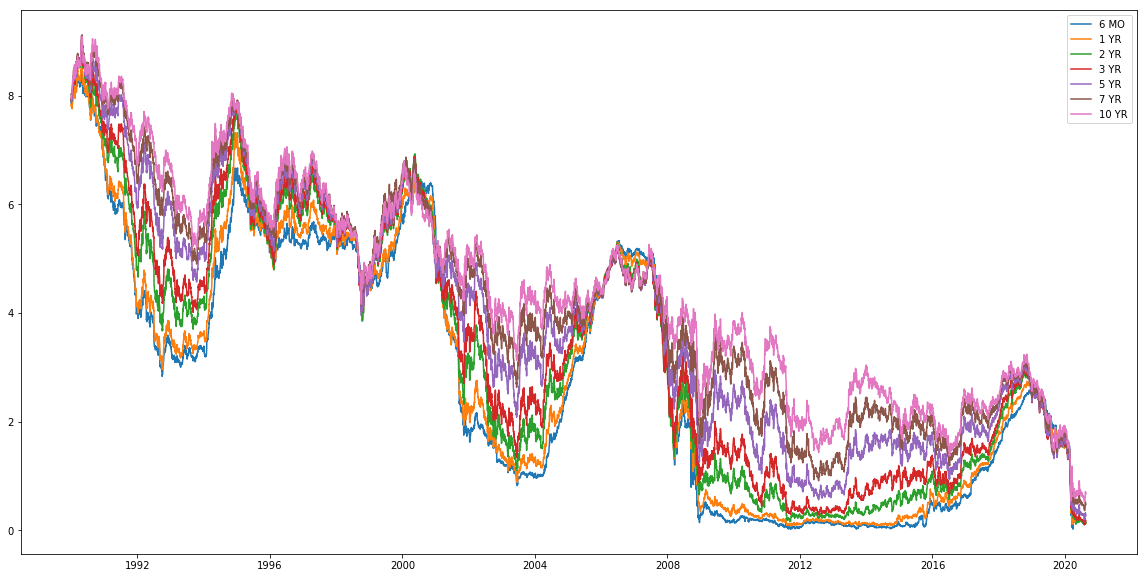

In [52]:
plt.figure(figsize=(20,10));
plt.plot(df);
plt.legend(df);

In [82]:
df.columns

Index(['3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR', '10 YR',
       '20 YR'],
      dtype='object')

### Yearly Yield curve plots

In [107]:
dfyear = df.groupby(df.index.year).mean()
len(dfyear)

28

In [117]:
yieldcurves

Date,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3 MO,3.132903,4.372490,5.66036,5.145595,5.20144,4.90696,4.777211,5.999920,3.478669,1.63532,...,0.05284,0.08760,0.05708,0.03272,0.052510,0.31936,0.94896,1.971687,2.10576,0.512013
6 MO,3.306290,4.826506,5.81756,5.290635,5.39016,5.02016,4.945817,6.173984,3.453065,1.71648,...,0.09572,0.13384,0.08832,0.06460,0.165498,0.46304,1.07044,2.144819,2.10944,0.523082
1 YR,3.528710,5.317470,5.94212,5.515913,5.63152,5.05252,5.083108,6.112948,3.490000,2.00188,...,0.18088,0.17484,0.13116,0.12112,0.322709,0.61432,1.20288,2.330843,2.05212,0.515597
2 YR,4.085000,5.942972,6.15144,5.844960,5.99088,5.13052,5.434303,6.260916,3.830887,2.63776,...,0.44936,0.27616,0.30708,0.46208,0.686773,0.83420,1.39920,2.527068,1.96880,0.529057
3 YR,4.408710,6.270442,6.25472,5.994802,6.10296,5.13792,5.492948,6.220598,4.089274,3.09992,...,0.74676,0.38228,0.54284,0.89796,1.024542,1.00400,1.57720,2.626627,1.93756,0.557547
5 YR,4.977903,6.688273,6.38332,6.182103,6.22468,5.15232,5.550040,6.157769,4.556694,3.81572,...,1.51824,0.76172,1.17208,1.64160,1.531036,1.33472,1.90964,2.748996,1.95300,0.645786
7 YR,5.333387,6.907711,6.49644,6.343770,6.32692,5.27864,5.786255,6.200518,4.881653,4.30460,...,2.15684,1.22044,1.73752,2.14404,1.891195,1.63432,2.15892,2.852209,2.04544,0.810755
10 YR,5.615968,7.085181,6.57392,6.443532,6.35396,5.26288,5.646135,6.030279,5.020685,4.61308,...,2.78164,1.80344,2.35016,2.53956,2.138287,1.83744,2.32948,2.911245,2.14140,0.937862
20 YR,6.285968,7.490080,6.95464,6.826111,6.68684,5.71596,6.197809,6.230916,5.632177,5.43160,...,3.61756,2.54180,3.11828,3.07264,2.547530,2.21860,2.65196,3.018233,2.40132,1.353019


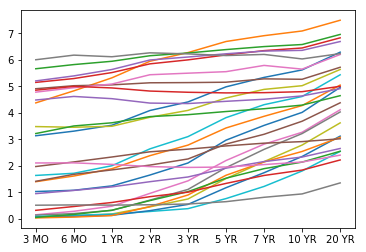

In [141]:
plt.plot(yieldcurves);

A little difficult to decipher which is where, lets separate this into subplots. How about 7 plots with 4 lines each?

In [190]:
new = yieldcurves.iloc[:,0:4]
new.columns[-1]

1996

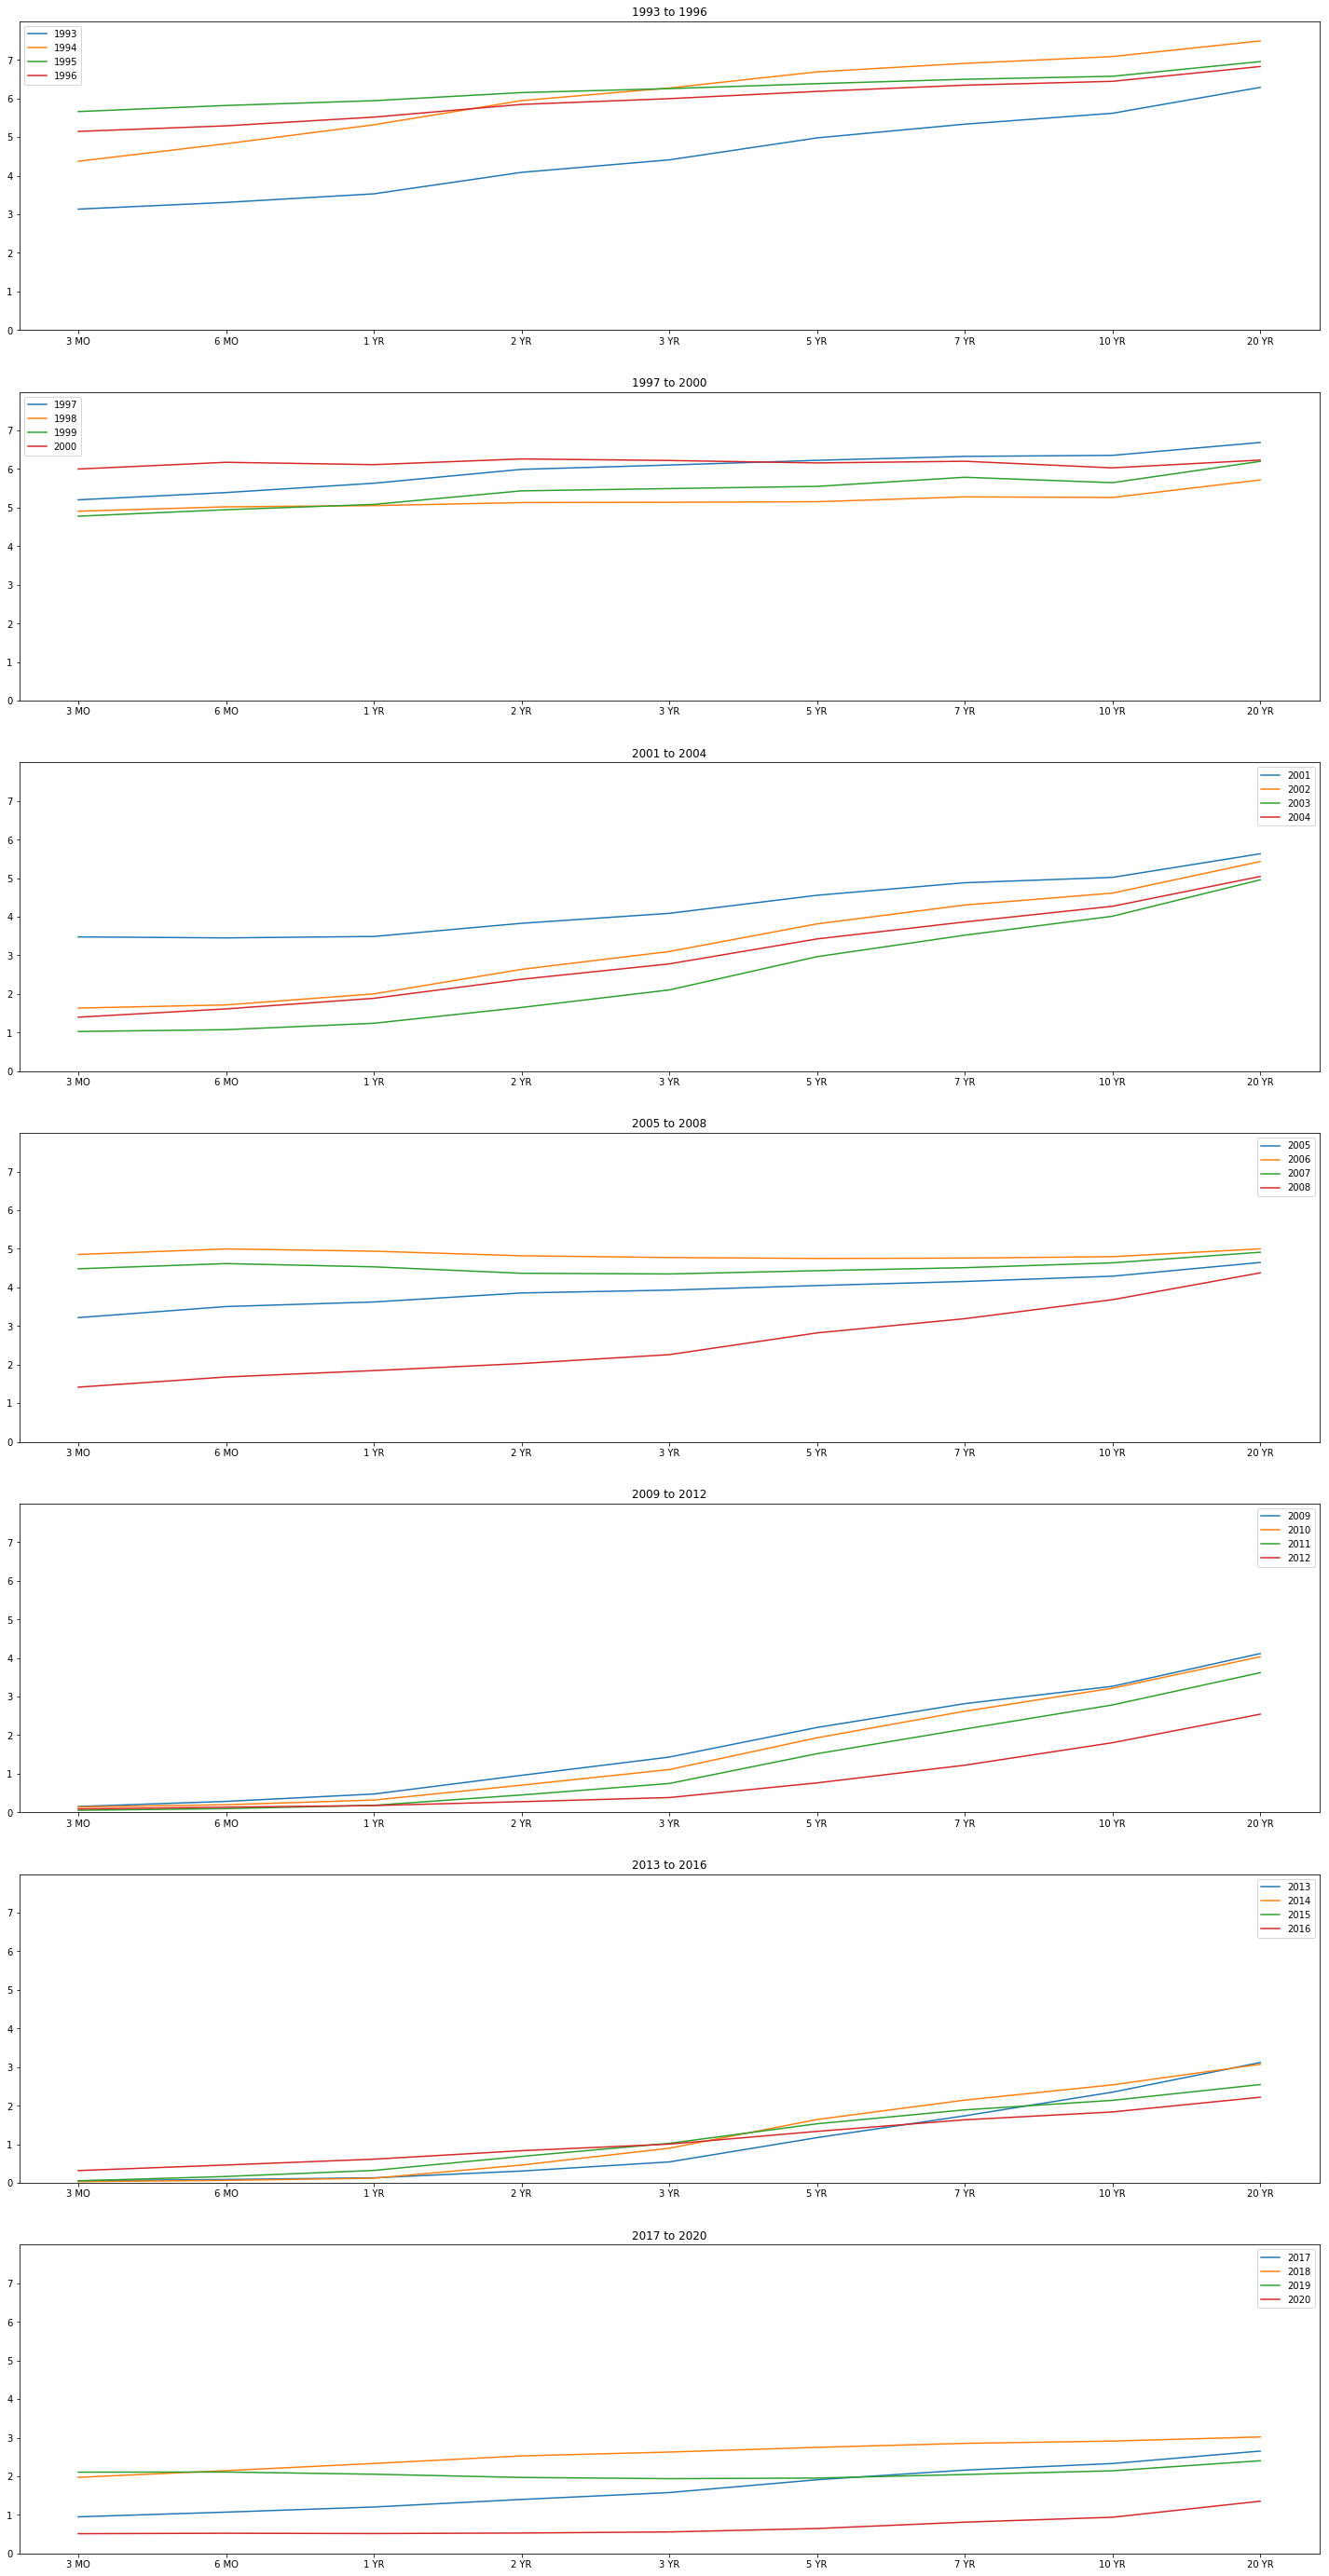

In [223]:
f, axes = plt.subplots(7, 1, figsize=(25, 50))
j = 0
while j < 7:
    for i in range(0,len(dfyear),4):
        new = yieldcurves.iloc[:,i:i+4]
        axes[j].set_ylim((0,8))
        axes[j].set_yticks(np.arange(0, 8, 1))
        axes[j].set_title(f"{new.columns[0]} to {new.columns[-1]}")
        axes[j].plot(new, label = new.columns)
        axes[j].legend(new)
        
        j += 1

In [180]:
new = yieldcurves.iloc[:,0:4]
new

Date,1993,1994,1995,1996
3 MO,3.132903,4.372490,5.66036,5.145595
6 MO,3.306290,4.826506,5.81756,5.290635
1 YR,3.528710,5.317470,5.94212,5.515913
2 YR,4.085000,5.942972,6.15144,5.844960
3 YR,4.408710,6.270442,6.25472,5.994802
5 YR,4.977903,6.688273,6.38332,6.182103
7 YR,5.333387,6.907711,6.49644,6.343770
10 YR,5.615968,7.085181,6.57392,6.443532
20 YR,6.285968,7.490080,6.95464,6.826111


In [1]:
def generator(data, lookback, delay, min_index, max_index, 
              shuffle = False, batch_size= 128, step = 6):
    if max_index is None:
        #Setting index for code
        max_index = len(data) - delay - 1 
    i = min_index + lookback 
    
    while 1:
        if shuffle:
            
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else: 
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback // step,
                               data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1] # What is this 1 doing here?
            
        yield samples, targets   


In [2]:
import os 

In [6]:
os.chdir('/Users/nicoogawa/Documents/Data/MVPY/data')
